Plain gradient descent

Own inversion [[2. ]
 [5. ]
 [0.1]]
Theta from GD: [[2.00079794]
 [4.99794023]
 [0.10099526]]


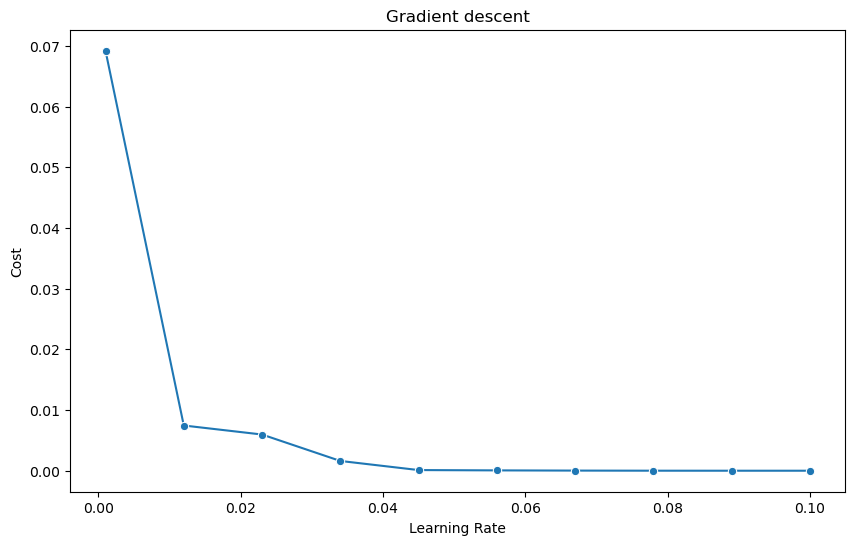

In [123]:
#Importing various packages
import seaborn as sns
import pandas as pd
from math import exp, sqrt
from random import random, seed
import autograd.numpy as np 
import matplotlib.pyplot as plt
from autograd import grad

np.random.seed(20)

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 2.0+5*x+0.1*x*x
# Creates a design matrix with a column with 1
X = np.c_[np.ones((n,1)), x,x*x]
XT_X = X.T @ X
# Matrix inversion
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion", theta_linreg)

# Hessian matrix, used to find the gradient
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)

# Intervals for the learning rate
eta_values = np.linspace(0.001, 0.1, 10)
Niterations = 3000

# List to collect results
results = []

for eta in eta_values:
    # Initialialize random weights
    theta = np.random.randn(3, 1)
   
   # Gradient descent
    for iter in range(Niterations):
        gradients = (2.0 / n) * X.T @ ((X @ theta) - y)
        theta -= eta * gradients
    
    #Calculate cost
    cost = CostOLS(theta)
    results.append([eta, cost])

print("Theta from GD:", theta)
# Converts the results to a DataFrame
df_results = pd.DataFrame(results, columns=["eta", "cost"])

# Seaborn plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="eta", y="cost", marker="o", data=df_results)
plt.title("Gradient descent")
plt.xlabel("Learning Rate")
plt.ylabel("Cost")
plt.show()

Gradient Descent with momentum

Own inversion [[2. ]
 [5. ]
 [0.1]]
Theta from GD with momentum: [[2.00000001]
 [4.99999998]
 [0.10000001]]


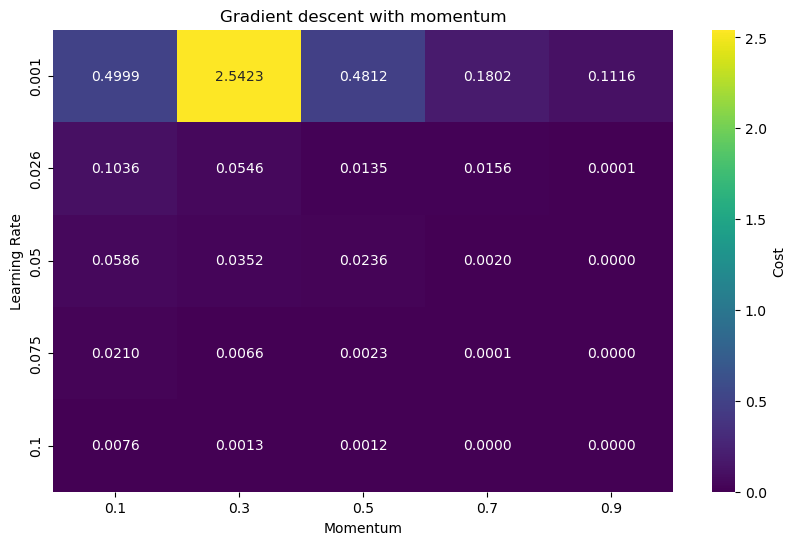

In [2]:
np.random.seed(20)

# Set ranges for learning rate (eta) and momentum
eta_values = np.round(np.linspace(0.001, 0.1, 5), 3)  # Round to 3 decimal places
momentum_values = np.round(np.linspace(0.1, 0.9, 5), 2)  # Round to 2 decimal places
Niterations = 550  # Number of iterations

# Empty list to store results
results = []

# Loop over all combinations of eta and momentum
for eta in eta_values:
    for delta_momentum in momentum_values:
        # Initialize random weights for theta
        theta = np.random.randn(3, 1)
        change = 0.0  # Initialize change for momentum to zero

        # Gradient Descent with Momentum
        for iter in range(Niterations):
            # Calculate gradient
            n = len(y)
            gradients = (2.0 / n) * X.T @ ((X @ theta) - y)
            # Calculate the update with momentum
            new_change = eta * gradients + delta_momentum * change
            # Take a step
            theta -= new_change
            # Save the change for the next iteration
            change = new_change
        
        # Calculate cost and store the result
        cost = CostOLS(theta)
        results.append([eta, delta_momentum, cost])

print("Own inversion", theta_linreg)
print("Theta from GD with momentum:", theta)

# Convert results to a DataFrame
df_results = pd.DataFrame(results, columns=["eta", "delta_momentum", "cost"])

# Create a pivot table for plotting
df_pivot = df_results.pivot(index="eta", columns="delta_momentum", values="cost")

# Plot using Seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap="viridis", cbar_kws={'label': 'Cost'}, fmt=".4f")
plt.title("Gradient descent with momentum")
plt.xlabel("Momentum")
plt.ylabel("Learning Rate")
plt.show()

Stochastic gradient descent

Own inversion [[2. ]
 [5. ]
 [0.1]]
theta from own sdg [[2.18624775]
 [4.52636859]
 [0.33034893]]


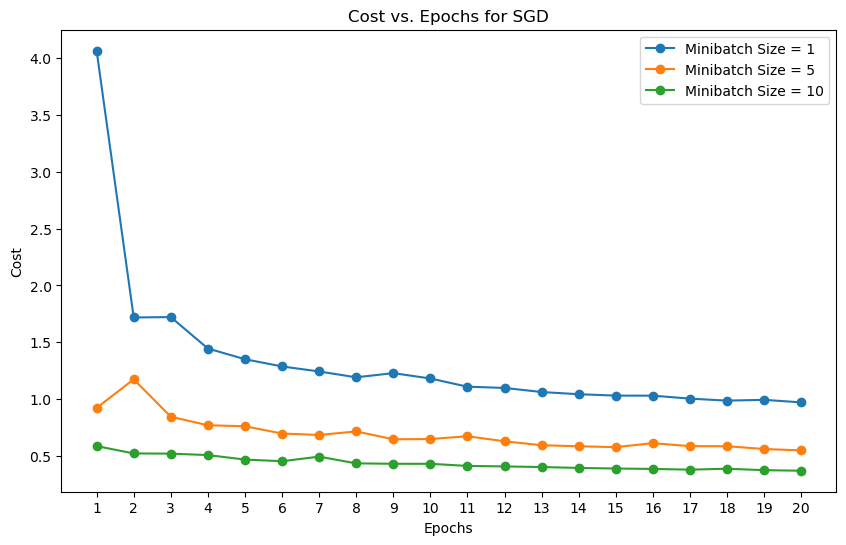

In [3]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import autograd.numpy as np 
import matplotlib.pyplot as plt

np.random.seed(20)

def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)
n = 100
x = 2*np.random.rand(n,1)
y = 2.0+5*x+0.1*x*x
# Creates a design matrix with a column with 1
X = np.c_[np.ones((n,1)), x,x*x]
XT_X = X.T @ X
# Matrix inversion
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion", theta_linreg)

# Hessian matrix, used to find the gradient
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 20
M = 5  #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
theta = np.random.randn(3, 1)

def learning_schedule(t):
    return t0/(t+t1)


# Initialize lists to store results for plotting
epoch_results = []

# Loop over minibatch-størrelser
for M in [1, 5, 10]:
    m = int(n / M)
    cost_per_epoch = []

    # Loop over epoker
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = M * np.random.randint(m)
            xi = X[random_index:random_index + M]
            yi = y[random_index:random_index + M]
            gradients = (2.0 / M) * xi.T @ ((xi @ theta) - yi)
            eta = learning_schedule(epoch*m +1)
            theta -= eta * gradients
        
        # Beregn kostnad etter hver epoke
        cost = CostOLS(y, X, theta)
        cost_per_epoch.append(cost)
    
    epoch_results.append((M, cost_per_epoch))
print("theta from own sdg", theta)

# Plot kostnad som funksjon av epoker
plt.figure(figsize=(10, 6))
for M, costs in epoch_results:
    plt.plot(range(1, n_epochs+1), costs, marker='o', label=f"Minibatch Size = {M}")

plt.title("Cost vs. Epochs for SGD")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.xticks(range(1, n_epochs + 1))
plt.legend()
plt.show()


Stochastic gradient descent with momentum

Own inversion [[2. ]
 [5. ]
 [0.1]]
theta from gd wth momentum [[2.07415312]
 [5.07449581]
 [0.05500853]]


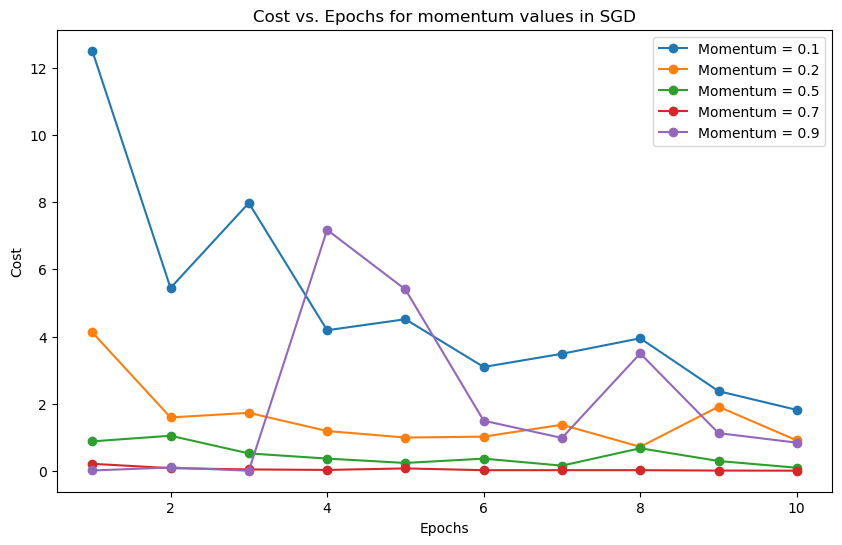

In [4]:
np.random.seed(20)

def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)
n = 100
x = 2*np.random.rand(n,1)
y = 2.0+5*x+0.1*x*x
# Creates a design matrix with a column with 1
X = np.c_[np.ones((n,1)), x,x*x]
XT_X = X.T @ X
# Matrix inversion
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion", theta_linreg)

M = 5  #size of each minibatch
m = int(n/M) #number of minibatches
theta = np.random.randn(3, 1)
n_epochs = 10

eta = 0.1


delta_momentum_values = [0.1, 0.2, 0.5,0.7,0.9]
momentum_results = []
# Loop over epoker
for delta_momentum in delta_momentum_values:
    change = np.zeros_like(theta)
    cost_per_epoch = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = M * np.random.randint(m)
            xi = X[random_index:random_index + M]
            yi = y[random_index:random_index + M]
            gradients = (2.0 / M) * xi.T @ ((xi @ theta) - yi)
            # calculate update
            change = eta*gradients+delta_momentum*change
                # take a step
            theta -= change
                
        cost = CostOLS(y, X, theta)
        cost_per_epoch.append(cost)
    momentum_results.append((delta_momentum, cost_per_epoch))
print("theta from gd wth momentum", theta)

plt.figure(figsize=(10, 6))
for momentum, costs in momentum_results:
    plt.plot(range(1, n_epochs + 1), costs, marker='o', label=f"Momentum = {momentum}")

plt.title("Cost vs. Epochs for momentum values in SGD")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.legend()
plt.show()

Gradient descent with RMSprop

Own inversion: [[2. ]
 [5. ]
 [0.1]]


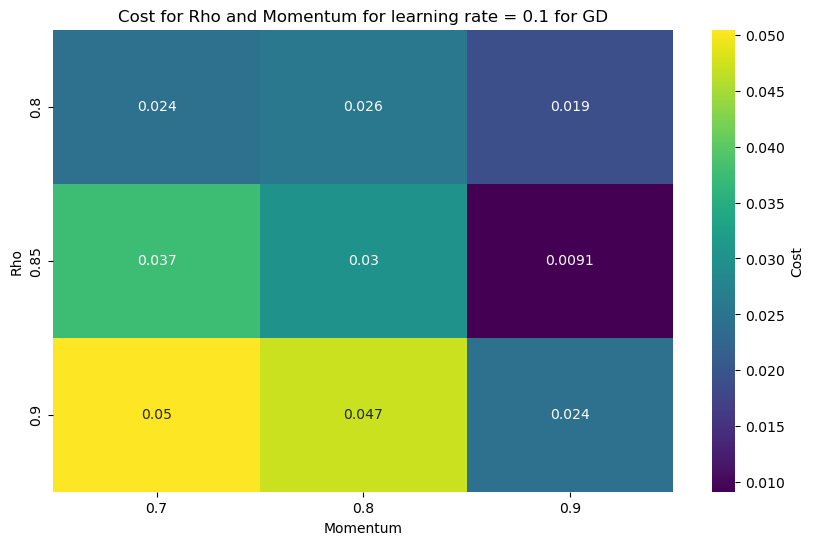

In [5]:
# Importing necessary packages
import autograd.numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting random seed for reproducibility
np.random.seed(20)

# Define the cost function
def CostOLS(theta, X):
    return (1.0 / n) * np.sum((y - X @ theta) ** 2)

# Generate data
n = 100
x = 2 * np.random.rand(n, 1)
y = 2.0 + 5 * x + 0.1 * x * x

# Create a design matrix with a column of ones
X = np.c_[np.ones((n, 1)), x, x * x]
XT_X = X.T @ X

# Calculate the analytical solution
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion:", theta_linreg)

# Initialize parameters
n_epochs = 100
eta_values = [0.01, 0.05, 0.1]
rho_values = [0.8, 0.85, 0.9]
momentum_values = [0.7, 0.8, 0.9]
delta = 0.9

# Store results for plotting
results = []

# Grid search over eta, rho, and momentum values
for eta in eta_values:
    for rho in rho_values:
        for delta_momentum in momentum_values:
            theta = np.random.randn(3, 1)
            Giter = np.zeros_like(theta)
            change = np.zeros_like(theta)

            # Run RMSprop with momentum
            for epoch in range(n_epochs):
                gradients = (2.0 / n) * X.T @ ((X @ theta) - y)
                Giter = rho * Giter + (1 - rho) * gradients ** 2
                adjusted_gradients = gradients * eta / (delta + np.sqrt(Giter))
                new_change = delta_momentum * change - adjusted_gradients
                theta += new_change
                change = new_change

            # Calculate final cost
            final_cost = CostOLS(theta, X)
            results.append([eta, rho, delta_momentum, final_cost])


# Convert results to a DataFrame
df_results = pd.DataFrame(results, columns=["eta", "rho", "momentum", "cost"])

# Create a heatmap of cost as a function of rho and momentum for the best eta
best_eta = eta_values[np.argmin(df_results.groupby("eta")["cost"].min())]
df_filtered = df_results[df_results["eta"] == best_eta]

# Pivot the DataFrame for heatmap
pivot_df = df_filtered.pivot(index="rho", columns="momentum", values="cost")


# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="viridis", cbar_kws={'label': 'Cost'})
plt.title(f"Cost for Rho and Momentum for learning rate = {best_eta} for GD")
plt.xlabel("Momentum")
plt.ylabel("Rho")
plt.show()

# Predictions and final plot
theta = np.random.randn(3, 1)
Giter = np.zeros_like(theta)
change = np.zeros_like(theta)

for epoch in range(n_epochs):
    gradients = (2.0 / n) * X.T @ ((X @ theta) - y)
    Giter = rho * Giter + (1 - rho) * gradients * gradients
    adjusted_gradients = gradients * eta / (delta + np.sqrt(Giter))
    new_change = rho * change - adjusted_gradients
    theta += new_change
    change = new_change

Own inversion: [[2. ]
 [5. ]
 [0.1]]
theta from GD with RMSprop
[[2.04997713]
 [5.04995918]
 [0.14997849]]


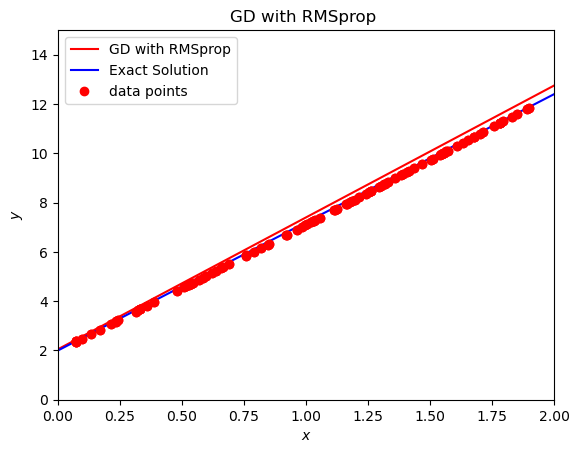

theta from GD wth momentum and RMSprop [[2.04367411]
 [5.04367421]
 [0.1436741 ]]


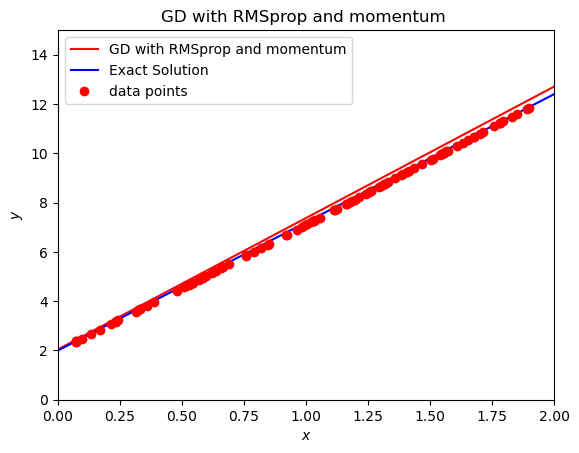

In [88]:
# Importing necessary packages
import autograd.numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting random seed for reproducibility
np.random.seed(20)

# Define the cost function
def CostOLS(theta, X):
    return (1.0 / n) * np.sum((y - X @ theta) ** 2)

# Generate data
n = 100
x = 2 * np.random.rand(n, 1)
y = 2.0 + 5 * x + 0.1 * x * x

# Create a design matrix with a column of ones
X = np.c_[np.ones((n, 1)), x, x * x]
XT_X = X.T @ X

# Calculate the analytical solution
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion:", theta_linreg)

# Initialize parameters
n_epochs = 100
eta = 0.1
rho = 0.85
delta_momentum = 0.9
delta = 1e-8

for epoch in range(n_epochs):
        gradients = (2.0 / n) * X.T @ ((X @ theta) - y)
        Giter = (rho*Giter+(1-rho)*gradients*gradients)
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update

print("theta from GD with RMSprop")
print(theta)

# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-", label="GD with RMSprop")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y ,'ro', label="data points")
plt.plot(x, y ,'ro')
plt.legend()
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'GD with RMSprop ')
plt.show()


for epoch in range(n_epochs):
    # calculate gradient
    gradients =  (2.0 / n) * X.T @ ((X @ theta) - y)
    Giter = (rho*Giter+(1-rho)*gradients*gradients)
    # AdaGrad adjustment
    adjusted_gradients = gradients*eta/(delta+np.sqrt(Giter))
    # calculate update
    new_change = (delta_momentum*change)-adjusted_gradients
    # take a step
    theta += new_change
    # save the change
    change = new_change

print("theta from GD wth momentum and RMSprop", theta)

# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-", label="GD with RMSprop and momentum")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y ,'ro', label="data points")
plt.axis([0,2.0,0, 15.0])
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'GD with RMSprop and momentum ')
plt.show()


Stochastic Gradient Descent with RMSprop

Own inversion: [[2. ]
 [5. ]
 [0.1]]


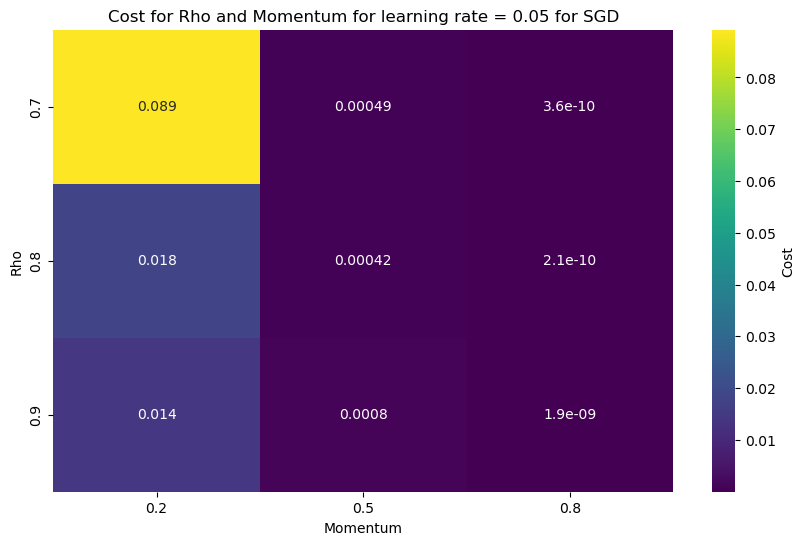

In [7]:
# Import necessary packages
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(20)

# Define the cost function
def CostOLS(theta, X, y):
    return np.sum((y - X @ theta) ** 2)

# Generate data
n = 100
x = 2 * np.random.rand(n, 1)
y = 2.0 + 5 * x + 0.1 * x * x
X = np.c_[np.ones((n, 1)), x, x * x]

# Analytical solution
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion:", theta_linreg)

# Hyperparameter ranges
rho_values = [0.7, 0.8, 0.9]
delta_values = [0.5, 0.7, 0.9]
momentum_values = [0.2, 0.5, 0.8]

# Fixed parameters
n_epochs = 100
M = 5
m = int(n / M)
eta = 0.05

# Store results
results = []

# Grid search over rho, delta, and momentum
for rho in rho_values:
    for delta in delta_values:
        for momentum in momentum_values:
            theta = np.random.randn(3, 1)
            Giter = np.zeros_like(theta)
            change = np.zeros_like(theta)

            # Train with RMSprop and momentum
            for epoch in range(n_epochs):
                for i in range(m):
                    random_index = M * np.random.randint(m)
                    xi = X[random_index:random_index + M]
                    yi = y[random_index:random_index + M]
                    gradients = (2.0 / M) * xi.T @ ((xi @ theta) - yi)
                    Giter = rho * Giter + (1 - rho) * gradients ** 2
                    adjusted_gradients = gradients * eta / (delta + np.sqrt(Giter))
                    new_change = momentum * change - adjusted_gradients
                    theta += new_change
                    change = new_change

            # Calculate final cost
            final_cost = CostOLS(theta, X, y)
            results.append([rho, delta, momentum, final_cost])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["rho", "delta", "momentum", "cost"])


# Pivot the DataFrame for heatmap
pivot_df = df_results.pivot_table(index="rho", columns="momentum", values="cost")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="viridis", cbar_kws={'label': 'Cost'})
plt.title(f"Cost for Rho and Momentum for learning rate = {eta} for SGD")
plt.xlabel("Momentum")
plt.ylabel("Rho")
plt.show()

Own inversion: [[2. ]
 [5. ]
 [0.1]]

Theta from SGD with RMSprop: [[2.07963043]
 [4.8180089 ]
 [0.18697891]]


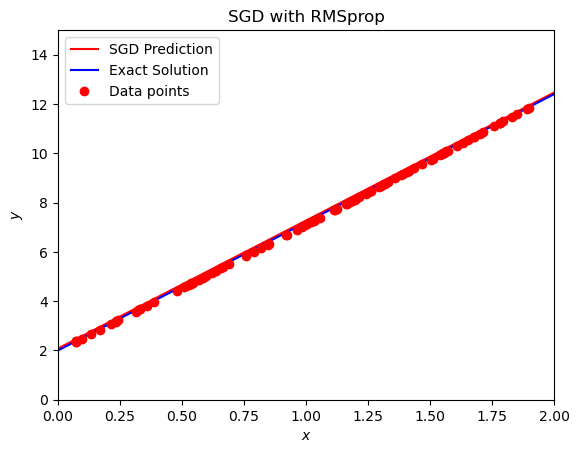


Theta from SGD with RMSprop and momentum: [[2.00000011]
 [4.99999971]
 [0.10000014]]


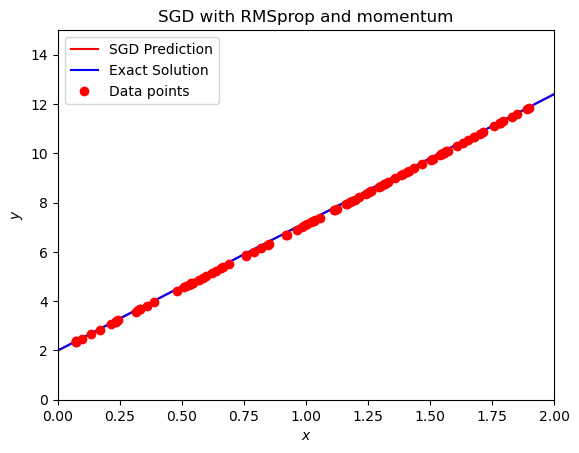

In [8]:
# Import necessary packages
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(20)

# Define the cost function
def CostOLS(theta, X, y):
    return np.sum((y - X @ theta) ** 2)

# Generate data
n = 100
x = 2 * np.random.rand(n, 1)
y = 2.0 + 5 * x + 0.1 * x * x
X = np.c_[np.ones((n, 1)), x, x * x]

# Analytical solution
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion:", theta_linreg)

# Fixed parameters
n_epochs = 100
M = 5
m = int(n / M)
eta = 0.05
theta = np.random.randn(3, 1)
Giter = np.zeros_like(theta)
change = np.zeros_like(theta)
delta = 0.9
momentum = 0.8
rho = 0.8

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M * np.random.randint(m)
        xi = X[random_index:random_index + M]
        yi = y[random_index:random_index + M]
        gradients = (2.0 / M) * xi.T @ ((xi @ theta) - yi)
        Giter = rho * Giter + (1 - rho) * gradients * gradients
        adjusted_gradients = gradients * eta / (delta + np.sqrt(Giter))
        theta -= adjusted_gradients

print("\nTheta from SGD with RMSprop:", theta)

# Predictions and final plot
xnew = np.array([[0], [2]])
Xnew = np.c_[np.ones((2, 1)), xnew, xnew * xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

# Plot predictions
plt.plot(xnew, ypredict, "r-", label="SGD Prediction")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.axis([0, 2.0, 0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'SGD with RMSprop')
plt.legend()
plt.show()


for epoch in range(n_epochs):
    for i in range(m):
        random_index = M * np.random.randint(m)
        xi = X[random_index:random_index + M]
        yi = y[random_index:random_index + M]
        gradients = (2.0 / M) * xi.T @ ((xi @ theta) - yi)
        Giter = rho * Giter + (1 - rho) * gradients ** 2
        adjusted_gradients = gradients * eta / (delta + np.sqrt(Giter))
        new_change = momentum * change - adjusted_gradients
        theta += new_change
        change = new_change

print("\nTheta from SGD with RMSprop and momentum:", theta)

# Predictions and final plot
xnew = np.array([[0], [2]])
Xnew = np.c_[np.ones((2, 1)), xnew, xnew * xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

# Plot predictions
plt.plot(xnew, ypredict, "r-", label="SGD Prediction")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.axis([0, 2.0, 0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'SGD with RMSprop and momentum')
plt.legend()
plt.show()

Gradient Descent with AdaGrad

Own inversion: [[2. ]
 [5. ]
 [0.1]]
theta from GD with AdaGrad
[[2.41823609]
 [3.90552928]
 [0.63222437]]


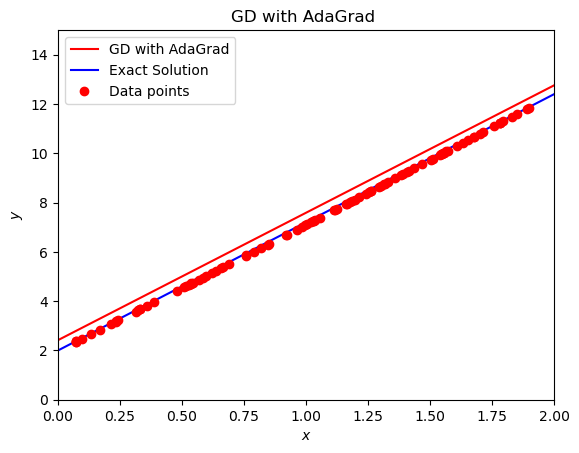

theta from gd wth momentum and AdaGrad [[2.00349075]
 [4.99086524]
 [0.10444208]]


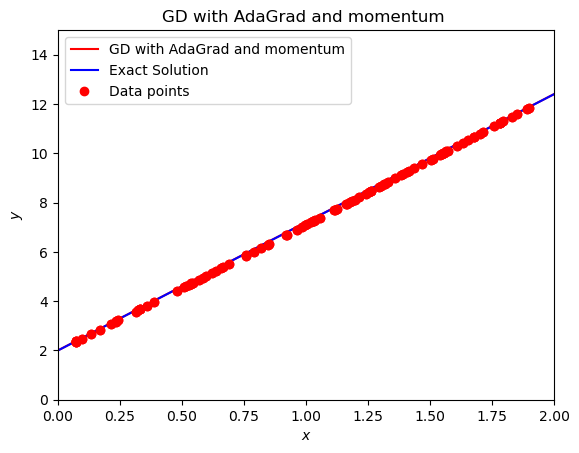

In [85]:
#Importing various packages
from math import exp, sqrt
from random import random, seed
import autograd.numpy as np 
import matplotlib.pyplot as plt
from autograd import grad

np.random.seed(20)

# Define the cost function
def CostOLS(theta, X, y):
    return np.sum((y - X @ theta) ** 2)

# Generate data

n = 100
x = 2 * np.random.rand(n, 1)
y = 2.0 + 5 * x + 0.1 * x * x
X = np.c_[np.ones((n, 1)), x, x * x]

# Analytical solution
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion:", theta_linreg)

n_epochs = 250
eta = 1.5
delta_momentum = 0.9
delta = 1e-5
theta = np.random.randn(3,1)
Giter = np.zeros_like(theta)


for epoch in range(n_epochs):
        gradients =  (2.0 / n) * X.T @ ((X @ theta) - y)
        Giter += gradients*gradients
         # AdaGrad adjustment
        adjusted_gradients = gradients*eta/(delta+np.sqrt(Giter))
        # calculate update
        theta -= adjusted_gradients

print("theta from GD with AdaGrad")
print(theta)

# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-", label="GD with AdaGrad")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.axis([0,2.0,0, 15.0])
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'GD with AdaGrad ')
plt.show()


#Now improve with momentum gradient descent and AdaGrad
change = np.zeros_like(theta)

for epoch in range(n_epochs):
    # calculate gradient
    gradients =  (2.0 / n) * X.T @ ((X @ theta) - y)
    Giter += gradients*gradients
    # AdaGrad adjustment
    adjusted_gradients = gradients*eta/(delta+np.sqrt(Giter))
    # calculate update
    change = delta_momentum * change - adjusted_gradients
    # Update theta
    theta += change

print("theta from gd wth momentum and AdaGrad", theta)

# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-", label="GD with AdaGrad and momentum")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'GD with AdaGrad and momentum ')
plt.show()

Own inversion: [[2. ]
 [5. ]
 [0.1]]
Best hyperparameters: eta=1.0, delta_momentum=0.9, delta=1e-05


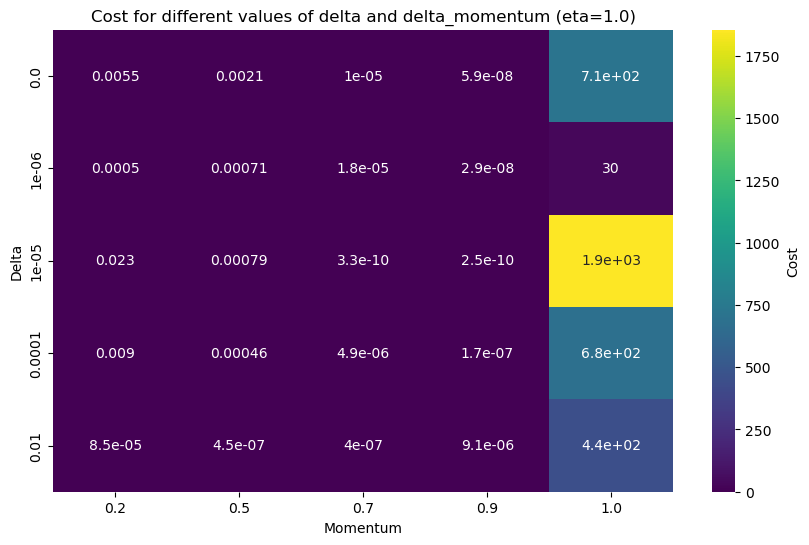

In [79]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(20)

# Define the cost function
def CostOLS(theta, X, y):
    return np.sum((y - X @ theta) ** 2)

# Generate data
n = 100
x = 2 * np.random.rand(n, 1)
y = 2.0 + 5 * x + 0.1 * x * x
X = np.c_[np.ones((n, 1)), x, x * x]

# Analytical solution
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion:", theta_linreg)

# Hyperparameter ranges for grid search
eta_values = [0.01, 0.05, 0.1,0.9,1]
delta_momentum_values = [0.2,0.5, 0.7, 0.9,1]
delta_values = [1e-6, 1e-5, 1e-4,1e-2,0]

# Fixed parameters
n_epochs = 250
M = 10
m = int(n / M)

# Store results
results = []

# Grid search loop
for eta in eta_values:
    for delta_momentum in delta_momentum_values:
        for delta in delta_values:
            theta = np.random.randn(3, 1)
            Giter = np.zeros_like(theta)
            change = np.zeros_like(theta)

            # Run SGD with AdaGrad and momentum
            for epoch in range(n_epochs):
                for i in range(m):
                    random_index = M * np.random.randint(m)
                    xi = X[random_index:random_index + M]
                    yi = y[random_index:random_index + M]
                    gradients = (1.0 / M) * xi.T @ ((xi @ theta) - yi)
                    Giter += gradients * gradients
                    adjusted_gradients = eta * gradients / (delta + np.sqrt(Giter))
                    # Momentum update
                    new_change = delta_momentum * change - adjusted_gradients
                    theta += new_change
                    change = new_change

            # Calculate final cost
            final_cost = CostOLS(theta, X, y)
            results.append([eta, delta_momentum, delta, final_cost])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["eta", "delta_momentum", "delta", "cost"])

# Find the best hyperparameters
best_index = df_results["cost"].idxmin()
best_eta = df_results.loc[best_index, "eta"]
best_delta_momentum = df_results.loc[best_index, "delta_momentum"]
best_delta = df_results.loc[best_index, "delta"]

print(f"Best hyperparameters: eta={best_eta}, delta_momentum={best_delta_momentum}, delta={best_delta}")

# Visualize the results with a heatmap
pivot_df = df_results.pivot_table(index="delta", columns="delta_momentum", values="cost", aggfunc="min")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="viridis", cbar_kws={'label': 'Cost'})
plt.title(f"Cost for different values of delta and delta_momentum (eta={best_eta})")
plt.xlabel("Momentum")
plt.ylabel("Delta")
plt.show()


Stochastic Gradient Descent with Adagrad

Own inversion: [[2. ]
 [5. ]
 [0.1]]
theta from SDG with AdaGrad
[[2.22513056]
 [3.42989824]
 [1.06980184]]


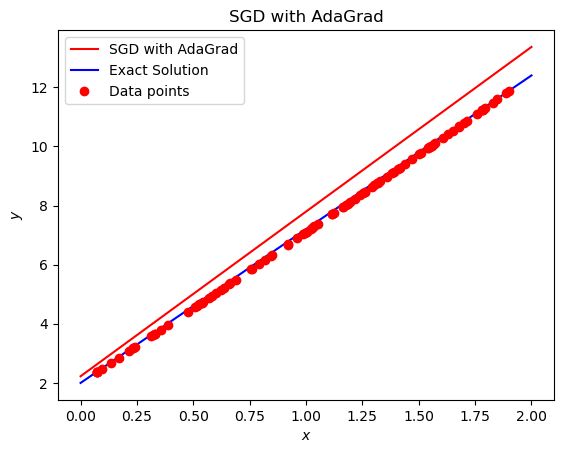

theta from sdg with momentum and AdaGrad
[[2.00281874]
 [4.99292155]
 [0.1036095 ]]


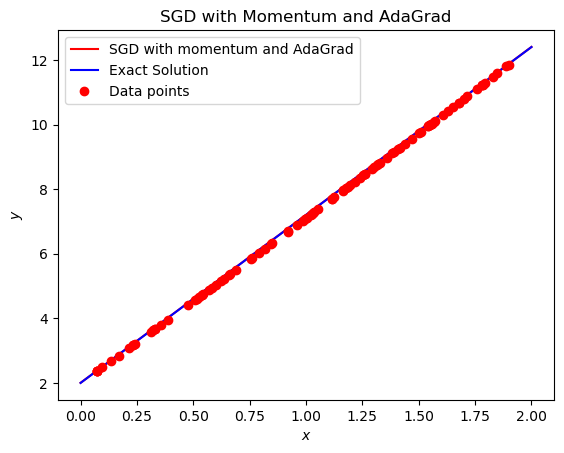

In [61]:
#Importing various packages
from math import exp, sqrt
from random import random, seed
import autograd.numpy as np 
import matplotlib.pyplot as plt
from autograd import grad

np.random.seed(20)

# Define the cost function
def CostOLS(theta, X, y):
    return np.sum((y - X @ theta) ** 2)

# Generate data

n = 100
x = 2 * np.random.rand(n, 1)
y = 2.0 + 5 * x + 0.1 * x * x
X = np.c_[np.ones((n, 1)), x, x * x]

# Analytical solution
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion:", theta_linreg)

n_epochs = 250
eta = 0.05
delta_momentum = 0.8
delta = 1e-6
M = 5
m = int(n/M)
theta = np.random.randn(3,1)
Giter = np.zeros_like(theta)


for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)* xi.T @ ((xi @ theta)-yi)
        Giter += gradients*gradients
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update
print("theta from SDG with AdaGrad")
print(theta)


# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)


plt.plot(xnew, ypredict, "r-", label="SGD with AdaGrad")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.title(r'SGD with AdaGrad')
plt.show()

change = np.zeros_like(theta)  # Initialize change for momentum
Giter = np.zeros_like(theta)  # Reset AdaGrad accumulator


for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)* xi.T @ ((xi @ theta)-yi)
        # calculate update
        Giter += gradients*gradients
        adjusted_gradients = eta * gradients / (delta + np.sqrt(Giter))
        # Momentum update
        new_change = delta_momentum * change - adjusted_gradients
        theta += new_change
        change = new_change
print("theta from sdg with momentum and AdaGrad")
print(theta)

# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-", label="SGD with momentum and AdaGrad")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.title(r'SGD with Momentum and AdaGrad')
plt.show()


GD with Adam

Own inversion [[2. ]
 [5. ]
 [0.1]]
theta from GD with Adam
[[2.04712932]
 [4.87652411]
 [0.16007498]]


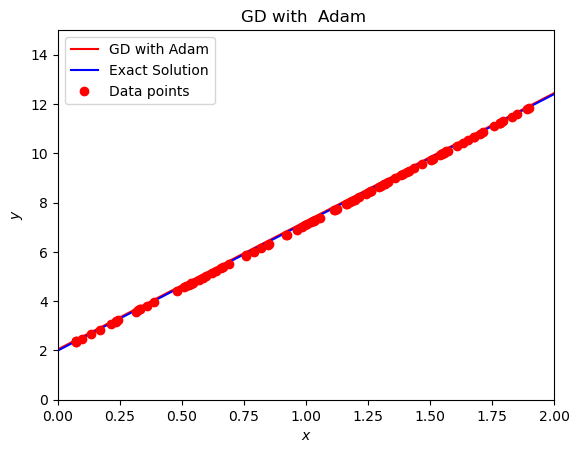

In [121]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import autograd.numpy as np 
import matplotlib.pyplot as plt

np.random.seed(20)

def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 2.0+5*x+0.1*x*x
# Creates a design matrix with a column with 1
X = np.c_[np.ones((n,1)), x,x*x]
XT_X = X.T @ X
# Matrix inversion
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion", theta_linreg)

n_epochs = 500
theta = np.random.randn(3,1)
# The learning rate
eta = 0.5
# The parameters beta1 and 2
beta1 = 0.9
beta2= 0.999
delta  = 1e-5
first_moment = np.zeros_like(theta)
second_moment = np.zeros_like(theta)

for epoch in range(n_epochs):
        gradients = (2.0 / n) * X.T @ ((X @ theta) - y)
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment + (1-beta2)*gradients*gradients
        first_term = first_moment/(1.0-beta1**(epoch+1))
        second_term = second_moment/(1-beta2**(epoch+1))
        update = first_term*eta/(delta+np.sqrt(second_term))
        theta -= update

print("theta from GD with Adam")
print(theta)

# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-", label="GD with Adam")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.axis([0,2.0,0, 15.0])
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'GD with  Adam ')
plt.show()

SDG with ADAM

Own inversion [[2. ]
 [5. ]
 [0.1]]
theta from SDG with Adam
[[2.01287794]
 [4.89394297]
 [0.14900517]]


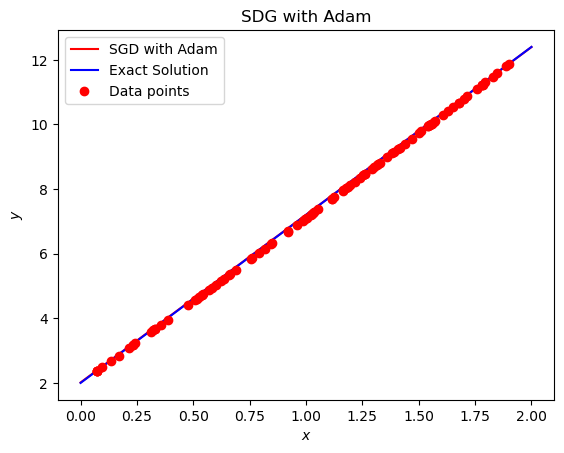

In [122]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import autograd.numpy as np 
import matplotlib.pyplot as plt

np.random.seed(20)

def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 2.0+5*x+0.1*x*x
# Creates a design matrix with a column with 1
X = np.c_[np.ones((n,1)), x,x*x]
XT_X = X.T @ X
# Matrix inversion
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion", theta_linreg)


# Stochastic Gradiant Descent

#Initalizes random weights for theta
theta = np.random.randn(3,1)

n_epochs = 500
M = 5  #size of each minibatch
m = int(n/M) #number of minibatches
eta = 0.01
Giter = np.zeros_like(theta)
delta  = 1e-5
beta1 = 0.9
beta2= 0.999


for epoch in range(n_epochs):
    for i in range(m):
        first_moment = 0
        second_moment = 0
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)* xi.T @ ((xi @ theta)-yi)
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment + (1-beta2)*gradients*gradients
        first_term = first_moment/(1-beta1**(epoch+1))
        second_term = second_moment/(1-beta2**(epoch+1))
        update = first_term*eta/(delta+np.sqrt(second_term))
        theta -= update
print("theta from SDG with Adam")
print(theta)


# Predictions
xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew, xnew*xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)


plt.plot(xnew, ypredict, "r-", label="SGD with Adam")
plt.plot(xnew, ypredict2, "b-", label="Exact Solution")
plt.plot(x, y, 'ro', label="Data points")
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'SDG with Adam')
plt.show()